In [12]:
def run_dqn (df,y,eps,ws,bs,lr):
    import os

    import numpy as np
    import tensorflow_datasets as tfds
    from imbDRL.agents.ddqn import TrainDDQN
    from imbDRL.data import get_train_test_val
    from imbDRL.utils import rounded_dict
    from sklearn.model_selection import train_test_split
    from tensorflow.keras.layers import Dense, Dropout

    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # CPU is faster than GPU on structured data

    episodes = eps  # Total number of episodes
    warmup_steps = ws  # Amount of warmup steps to collect data with random policy
    memory_length = warmup_steps  # Max length of the Replay Memory
    batch_size = bs
    collect_steps_per_episode = 500
    collect_every = 500

    target_update_period = 400  # Period to overwrite the target Q-network with the default Q-network
    target_update_tau = 1  # Soften the target model update
    n_step_update = 1

    layers = [Dense(256, activation="relu"), Dropout(0.2),
              Dense(256, activation="relu"), Dropout(0.2),
              Dense(2, activation=None)]  # No activation, pure Q-values

    learning_rate = lr  # Learning rate
    gamma = 0.0  # Discount factor
    min_epsilon = 0.5  # Minimal and final chance of choosing random action
    decay_episodes = episodes // 10  # Number of episodes to decay from 1.0 to `min_epsilon``

    min_class = [1]  # Minority classes
    maj_class = [0]  # Majority classes

    X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), y.to_numpy(), stratify=y, test_size=0.25)
    X_train, y_train, X_test, y_test, X_val, y_val = get_train_test_val(X_train, y_train, X_test, y_test,
                                                                        min_class, maj_class, val_frac=0.9)

    model = TrainDDQN(episodes, warmup_steps, learning_rate, gamma, min_epsilon, decay_episodes, target_update_period=target_update_period,
                      target_update_tau=target_update_tau, batch_size=batch_size, collect_steps_per_episode=collect_steps_per_episode,
                      memory_length=memory_length, collect_every=collect_every, n_step_update=n_step_update,model_path='modelfiles.pkl')

    model.compile_model(X_train, y_train, layers)
    #model.q_net.summary()
    model.train(X_val, y_val, "F1")

    stats = model.evaluate(X_test, y_test, X_train, y_train)
    return (rounded_dict(stats))


In [13]:
from imbDRL.data import get_train_test_val
from imbDRL.utils import rounded_dict
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
data_pokemon=pd.read_csv("pokemon_cleaned.csv")


In [15]:
data_pokemon.columns

Index(['Unnamed: 0', '#', 'Name', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Type 1_Bug',
       'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy',
       'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost',
       'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal',
       'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel',
       'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon',
       'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire',
       'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground',
       'Type 2_Ice', 'Type 2_None', 'Type 2_Normal', 'Type 2_Poison',
       'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water'],
      dtype='object')

In [16]:
data_pokemon = data_pokemon.drop(columns=['Unnamed: 0','#','Name'])

In [17]:
y = data_pokemon['Legendary']

In [18]:
data_pokemon = data_pokemon.drop(columns=['Legendary'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_pokemon.to_numpy(), y.to_numpy(), stratify=y, test_size=0.9)


In [20]:
sum(y_train)

6

Imbalance ratio `p`:
	train:      n=5, p=0.090909
	test:       n=16, p=0.086957
	validation: n=44, p=0.088710
10_000 frames collected!


Training the DDQN: 100%|██████████| 10000/10000 [00:21<00:00, 459.39it/s]

Best score: 0.151463!


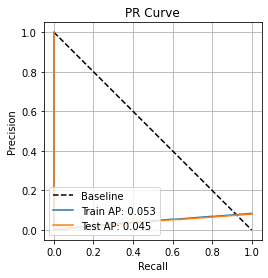

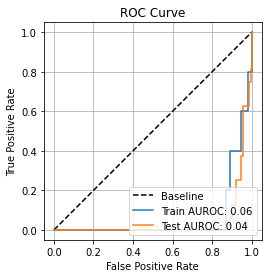

{'Gmean': 0.0,
 'F1': 0.148148,
 'Precision': 0.08,
 'Recall': 1.0,
 'TP': 16,
 'TN': 0,
 'FP': 184,
 'FN': 0}

In [21]:
run_dqn (data_pokemon,y,10000,10000,10,0.005)

Imbalance ratio `p`:
	train:      n=5, p=0.090909
	test:       n=16, p=0.086957
	validation: n=44, p=0.088710
100_000 frames collected!


Training the DDQN: 100%|██████████| 100000/100000 [03:38<00:00, 458.27it/s]

Best score: 0.158559!


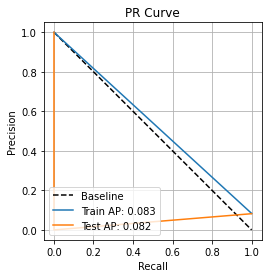

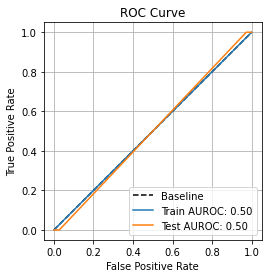

{'Gmean': 0.180579,
 'F1': 0.152381,
 'Precision': 0.082474,
 'Recall': 1.0,
 'TP': 16,
 'TN': 6,
 'FP': 178,
 'FN': 0}

In [22]:
run_dqn (data_pokemon,y,100000,100000,25,0.05)

Imbalance ratio `p`:
	train:      n=5, p=0.090909
	test:       n=16, p=0.086957
	validation: n=44, p=0.088710
100_000 frames collected!


Training the DDQN: 100%|██████████| 10000/10000 [00:26<00:00, 374.34it/s]

Best score: 0.150685!


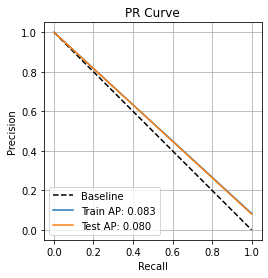

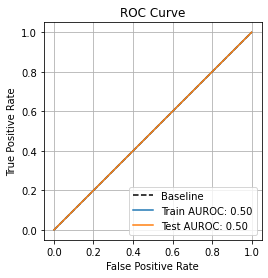

{'Gmean': 0.0,
 'F1': 0.148148,
 'Precision': 0.08,
 'Recall': 1.0,
 'TP': 16,
 'TN': 0,
 'FP': 184,
 'FN': 0}

In [23]:
run_dqn (data_pokemon,y,10000,100000,50,0.005)

In [47]:
data_pokemon1=pd.read_csv("pokemon_cleaned.csv")
data_pokemon1 = data_pokemon1.drop(columns=['Unnamed: 0','#','Name'])

In [48]:
normal = data_pokemon1.loc[data_pokemon1["Legendary"] == 0]
legendary = data_pokemon1.loc[data_pokemon1["Legendary"] == 1]
sampledNormal = normal.sample(100)

In [49]:
X = pd.concat([legendary, sampledNormal])

In [50]:
y1 = X['Legendary']
X= X.drop(columns=['Legendary'])

Imbalance ratio `p`:
	train:      n=5, p=0.714286
	test:       n=17, p=0.680000
	validation: n=43, p=0.632353
10_000 frames collected!


Training the DDQN: 100%|██████████| 10000/10000 [00:24<00:00, 407.89it/s]

Best score: 0.560000!


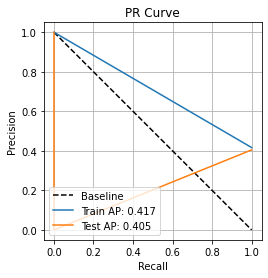

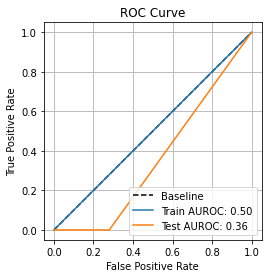

{'Gmean': 0.2,
 'F1': 0.586207,
 'Precision': 0.414634,
 'Recall': 1.0,
 'TP': 17,
 'TN': 1,
 'FP': 24,
 'FN': 0}

In [55]:
run_dqn (X,y1,10000,10000,50,0.05)

Imbalance ratio `p`:
	train:      n=5, p=0.714286
	test:       n=17, p=0.680000
	validation: n=43, p=0.632353
10_000 frames collected!


Training the DDQN: 100%|██████████| 10000/10000 [00:22<00:00, 446.05it/s]

Best score: 0.775510!


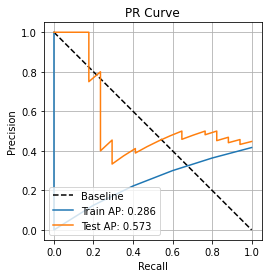

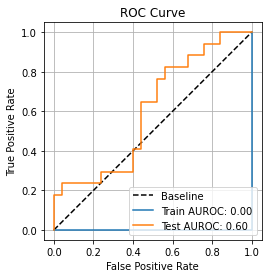

{'Gmean': 0.916515,
 'F1': 0.894737,
 'Precision': 0.809524,
 'Recall': 1.0,
 'TP': 17,
 'TN': 21,
 'FP': 4,
 'FN': 0}

In [60]:
run_dqn (X,y1,10000,10000,10,0.005)

Imbalance ratio `p`:
	train:      n=5, p=0.714286
	test:       n=17, p=0.680000
	validation: n=43, p=0.632353
100_000 frames collected!


Training the DDQN: 100%|██████████| 100000/100000 [03:27<00:00, 482.12it/s]


Best score: 0.637681!


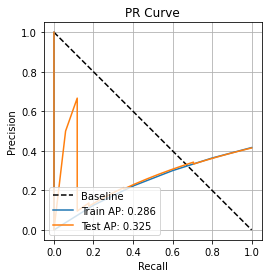

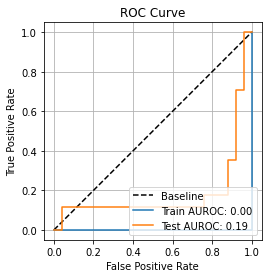

{'Gmean': 0.582086,
 'F1': 0.5,
 'Precision': 0.857143,
 'Recall': 0.352941,
 'TP': 6,
 'TN': 24,
 'FP': 1,
 'FN': 11}

In [61]:
run_dqn (X,y1,100000,100000,10,0.005)

In [ ]:
run_dqn (X,y1,100000,100000,10,0.005)

Imbalance ratio `p`:
	train:      n=5, p=0.714286
	test:       n=17, p=0.680000
	validation: n=43, p=0.632353
100_000 frames collected!


Training the DDQN: 100%|██████████| 100000/100000 [03:28<00:00, 478.58it/s]
